#### Data Information

###### Each day, two columns of data will show up for each country. More will be added in date order each day.
1. Top Trends: The top trends in each country, ranked in order of search interest in Coronavius.
2. Trending searches: Top trending searches are the fastest accelerating search terms in each county related to Coronavius

* There are **195 countries in the world today.** This total comprises 193 countries that are member states of the United Nations and 2 countries that are non-member observer states: the Holy See and the State of Palestine.
* We have only 40 countries data. 

* Key datasets from Google Trends, curated by the News Lab at Google team
    * A selection of datasets from Google Trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from googletrans import Translator#Translator translate to english#
import wikipedia #search on wiki
from googlesearch import search #search tops links
import geopandas as gpd # visualzise using map
from opencage.geocoder import OpenCageGeocode # gets coordinate 
from shapely.geometry import Point, Polygon # gets geomatry points
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# word colud

* In **Coronavirus_DailyTrends** datasets there are 42 excel sheets. In this dataset there are 40 country which i will merge tham all and create new dataset with usefull information.

In [2]:
xls = pd.ExcelFile('Coronavirus_DailyTrendsdata.xlsx')

* Click here for dataset <a href="https://github.com/taruntiwarihp/Projects_DS/blob/master/Google%20Trends%20Project/Coronavirus_DailyTrendsdata.xlsx">click here</a>

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/excel.PNG?raw=true'>

* This Coronaviur_DailyTrends data is looks like in excel.
* There are 42 excel sheets in data.
* **DESCRIPTIONS** sheet is describe little bit about data.
* **COUNTRY INDEX** sheet have counties name with thier **Abbreviation**.
* **AT** to **PH** sheets having all 40 counties data.
* I will gather usefull information from this data.

In [3]:
US = pd.read_excel(xls,'US') #Try with single country 

In [4]:
US.head()

,US,US.1,US.2,US.3,US.4,US.5,US.6,US.7,US.8,US.9,...,US.130,US.131,US.132,US.133,US.134,US.135,US.136,US.137,US.138,US.139
0,2020-04-06 City,2020-04-06 Trending,2020-04-07 City,2020-04-07 Trending,2020-04-08 City,2020-04-08 Trending,2020-04-09 City,2020-04-09 Trending,2020-04-10 City,2020-04-10 Trending,...,2020-06-10 City,2020-06-10 Trending,2020-06-11 City,2020-06-11 Trending,2020-06-12 City,2020-06-12 Trending,2020-06-13 City,2020-06-13 Trending,2020-06-14 City,2020-06-14 Trending
1,"Edison, New Jersey, United States",thank you coronavirus helpers,"Hialeah, Florida, United States",thank you coronavirus helpers,"Edison, New Jersey, United States",coronavirus prevention,"Hialeah, Florida, United States",coronavirus prevention,"Hialeah, Florida, United States",sweden coronavirus,...,"Scottsdale, Arizona, United States",coronavirus texas,"Scottsdale, Arizona, United States",dow jones,"Scottsdale, Arizona, United States",symptoms of the coronavirus,"Scottsdale, Arizona, United States",hawaii coronavirus,"Troy, Michigan, United States",new zealand coronavirus
2,"Troy, Michigan, United States",boris johnson,"Novi, Michigan, United States",boris johnson,"Hialeah, Florida, United States",john prine,"Edison, New Jersey, United States",stimulus checks,"Edison, New Jersey, United States",good friday,...,"Chandler, Arizona, United States",pa coronavirus,"Chandler, Arizona, United States",coronavirus texas,"Troy, Michigan, United States",oregon coronavirus,"Wheeling, Illinois, United States",oklahoma coronavirus,"Scottsdale, Arizona, United States",sushant singh rajput
3,"Hialeah, Florida, United States",dow jones,"Grafton, Massachusetts, United States",thank you coronavirus helpers google doodle,"Altamonte Springs, Florida, United States",bernie sanders,"Hyattsville, Maryland, United States",coronavirus stimulus check,"Grafton, Massachusetts, United States",john hopkins coronavirus stats,...,"Troy, Michigan, United States",blood type coronavirus,"Tempe, Arizona, United States",south carolina coronavirus,"Chandler, Arizona, United States",houston coronavirus,"Troy, Michigan, United States",china coronavirus,"Sun Lakes, Arizona, United States",china coronavirus
4,"Altamonte Springs, Florida, United States",tiger coronavirus,"Altamonte Springs, Florida, United States",coronavirus usa cases,"Grafton, Massachusetts, United States",stimulus checks,"Troy, Michigan, United States",thank you coronavirus helpers google doodle ga...,"Hyattsville, Maryland, United States",irs stimulus portal,...,"Tempe, Arizona, United States",pennsylvania coronavirus,"Gilbert, Arizona, United States",coronavirus second wave,"Tempe, Arizona, United States",florida coronavirus cases,"Ellicott City, Maryland, United States",vaccine coronavirus,"North Bethesda, Maryland, United States",rayshard brooks


* As we can se US country data has observation of 70 days, from 2020-04-06 to 2020-06-18

#### US folks also search about Indian actor **Sushant Singh Rajput** on his Date of death 14 June 2020

In [5]:
US['US.139'].mode().max() # trending search of the day

'sushant singh rajput'

In [6]:
US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 140 entries, US to US.139
dtypes: object(140)
memory usage: 110.6+ KB


* Now i will tansfer the first row as columns which will be easy to access.

In [7]:
US.columns = US.iloc[0]
US = US[1:]

In [8]:
US.head()

,2020-04-06 City,2020-04-06 Trending,2020-04-07 City,2020-04-07 Trending,2020-04-08 City,2020-04-08 Trending,2020-04-09 City,2020-04-09 Trending,2020-04-10 City,2020-04-10 Trending,...,2020-06-10 City,2020-06-10 Trending,2020-06-11 City,2020-06-11 Trending,2020-06-12 City,2020-06-12 Trending,2020-06-13 City,2020-06-13 Trending,2020-06-14 City,2020-06-14 Trending
1,"Edison, New Jersey, United States",thank you coronavirus helpers,"Hialeah, Florida, United States",thank you coronavirus helpers,"Edison, New Jersey, United States",coronavirus prevention,"Hialeah, Florida, United States",coronavirus prevention,"Hialeah, Florida, United States",sweden coronavirus,...,"Scottsdale, Arizona, United States",coronavirus texas,"Scottsdale, Arizona, United States",dow jones,"Scottsdale, Arizona, United States",symptoms of the coronavirus,"Scottsdale, Arizona, United States",hawaii coronavirus,"Troy, Michigan, United States",new zealand coronavirus
2,"Troy, Michigan, United States",boris johnson,"Novi, Michigan, United States",boris johnson,"Hialeah, Florida, United States",john prine,"Edison, New Jersey, United States",stimulus checks,"Edison, New Jersey, United States",good friday,...,"Chandler, Arizona, United States",pa coronavirus,"Chandler, Arizona, United States",coronavirus texas,"Troy, Michigan, United States",oregon coronavirus,"Wheeling, Illinois, United States",oklahoma coronavirus,"Scottsdale, Arizona, United States",sushant singh rajput
3,"Hialeah, Florida, United States",dow jones,"Grafton, Massachusetts, United States",thank you coronavirus helpers google doodle,"Altamonte Springs, Florida, United States",bernie sanders,"Hyattsville, Maryland, United States",coronavirus stimulus check,"Grafton, Massachusetts, United States",john hopkins coronavirus stats,...,"Troy, Michigan, United States",blood type coronavirus,"Tempe, Arizona, United States",south carolina coronavirus,"Chandler, Arizona, United States",houston coronavirus,"Troy, Michigan, United States",china coronavirus,"Sun Lakes, Arizona, United States",china coronavirus
4,"Altamonte Springs, Florida, United States",tiger coronavirus,"Altamonte Springs, Florida, United States",coronavirus usa cases,"Grafton, Massachusetts, United States",stimulus checks,"Troy, Michigan, United States",thank you coronavirus helpers google doodle ga...,"Hyattsville, Maryland, United States",irs stimulus portal,...,"Tempe, Arizona, United States",pennsylvania coronavirus,"Gilbert, Arizona, United States",coronavirus second wave,"Tempe, Arizona, United States",florida coronavirus cases,"Ellicott City, Maryland, United States",vaccine coronavirus,"North Bethesda, Maryland, United States",rayshard brooks
5,"Grafton, Massachusetts, United States",google classroom,"Hyattsville, Maryland, United States",consejos sobre el coronavirus,"Far Hills, New Jersey, United States",thank you coronavirus helpers doodle,"Far Hills, New Jersey, United States",coronavirus stimulus,"Altamonte Springs, Florida, United States",irs.gov/coronavirus,...,"Gilbert, Arizona, United States",texas coronavirus cases,"Peoria, Arizona, United States",stock market,"Gilbert, Arizona, United States",orange county coronavirus,"Chandler, Arizona, United States",chaz,"Ellicott City, Maryland, United States",signs of corona virus


* Now, i will gather the **top trends search of each day of a US country** and store this information in dictionary 

In [9]:
col = US.columns

In [10]:
ls= {}
for i in range(len(col)):
    if i%2!=0:
        ls[col[i]] = US[col[i]].mode().max()

In [11]:
ls #You can see,top trend of each day      

{'2020-04-06  Trending': 'wells fargo',
 '2020-04-07  Trending': 'when will stimulus checks be deposited',
 '2020-04-08  Trending': 'wuhan',
 '2020-04-09  Trending': 'todd chrisley',
 '2020-04-10  Trending': 'sweden coronavirus',
 '2020-04-11  Trending': 'us population',
 '2020-04-12  Trending': 'usa coronavirus updates',
 '2020-04-13  Trending': 'zoom',
 '2020-04-14  Trending': 'www.irs/coronavirus',
 '2020-04-15  Trending': 'www.irs/coronavirus.gov',
 '2020-04-16  Trending': 'www.irs.gov/coronavirus/get-my-payment',
 '2020-04-17  Trending': 'von miller',
 '2020-04-18  Trending': 'vitamin d and coronavirus',
 '2020-04-19  Trending': 'skin rash coronavirus',
 '2020-04-20  Trending': '新型 冠状 病毒',
 '2020-04-21  Trending': '新型 冠状 病毒',
 '2020-04-22  Trending': 'washington state coronavirus',
 '2020-04-23  Trending': '新型 冠状 病毒',
 '2020-04-24  Trending': 'uv light kill coronavirus',
 '2020-04-25  Trending': 'stroke coronavirus',
 '2020-04-26  Trending': 'texas coronavirus cases',
 '2020-04-27

* Now i will create a DataFrame of this trends search with dates

In [12]:
trends = pd.DataFrame(ls.values(),index = ls.keys(),columns=['Trends'])

In [13]:
trends.head()

,Trends
2020-04-06 Trending,wells fargo
2020-04-07 Trending,when will stimulus checks be deposited
2020-04-08 Trending,wuhan
2020-04-09 Trending,todd chrisley
2020-04-10 Trending,sweden coronavirus


* Now i do same analysis with all the countries, which i did with US country
* First i will take names of all countries

In [14]:
xls.sheet_names[2:] # here is name of all countries Abbreviation

['AT',
 'BE',
 'BG',
 'HR',
 'CY',
 'CZ',
 'DK',
 'EE',
 'FI',
 'FR',
 'DE',
 'GR',
 'HU',
 'IE',
 'IT',
 'LV',
 'LT',
 'LU',
 'MT',
 'NL',
 'PL',
 'PT',
 'RO',
 'SK',
 'SI',
 'ES',
 'SE',
 'GB',
 'BR',
 'US',
 'IL',
 'CA',
 'NZ',
 'MX',
 'AR',
 'CO',
 'CL',
 'PE',
 'AU',
 'PH']

In [15]:
sheet_names = xls.sheet_names[2:]

In [16]:
sheet_names # list of countirs Abbreviation

['AT',
 'BE',
 'BG',
 'HR',
 'CY',
 'CZ',
 'DK',
 'EE',
 'FI',
 'FR',
 'DE',
 'GR',
 'HU',
 'IE',
 'IT',
 'LV',
 'LT',
 'LU',
 'MT',
 'NL',
 'PL',
 'PT',
 'RO',
 'SK',
 'SI',
 'ES',
 'SE',
 'GB',
 'BR',
 'US',
 'IL',
 'CA',
 'NZ',
 'MX',
 'AR',
 'CO',
 'CL',
 'PE',
 'AU',
 'PH']

* Now i will create a list of all countries with full-name

In [17]:
country_names=[]

names_data = pd.read_excel(xls,xls.sheet_names[1])
names_data.head()

,Country,Abbreviation
0,Austria,AT
1,Belgium,BE
2,Bulgaria,BG
3,Croatia,HR
4,Republic of Cyprus,CY


In [18]:
names_data.shape # 40 countries

(40, 2)

In [19]:
names_data.iloc[1]

Country         Belgium
Abbreviation         BE
Name: 1, dtype: object

In [20]:
for i in range(len(names_data)):
    country_names.append(names_data.loc[i]['Country'])

In [21]:
country_names #list of countries name

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Republic of Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom',
 'Brazil',
 'United States',
 'Israel',
 'Canada',
 'New Zealand',
 'Mexico',
 'Argentina',
 'Colombia',
 'Chile',
 'Peru',
 'Australia',
 'Philippines']

* Now in this for loop all the countries will be concate(merge) together with usefull information in new dataframe

In [22]:
for xls_sheet_data in sheet_names:
    #read all country data
    data = pd.read_excel(xls,xls_sheet_data)
    #take 1st row as column
    data.columns = data.iloc[0]
    data = data[1:]
    #creating dictiony of top tranding of each country as date wise 
    col = data.columns
    top_trends= {}
    for i in range(len(col)):
        if i%2!=0:
            top_trends[col[i]] = data[col[i]].mode().max()
    #create dataframe of top trends and merge tham all
    top_trends_df = pd.DataFrame(top_trends.values(),index = top_trends.keys(),columns=[xls_sheet_data])

    trends = pd.concat([trends, top_trends_df], axis=1, sort=False)

In [32]:
countries_trends_df = trends.iloc[:,1:]

In [33]:
countries_trends_df.columns = country_names

In [34]:
countries_trends_df.head()

,Austria,Belgium,Bulgaria,Croatia,Republic of Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Israel,Canada,New Zealand,Mexico,Argentina,Colombia,Chile,Peru,Australia,Philippines
2020-04-06 Trending,zib österreich coronavirus,webmail telenet,ьфэ,švedska koronavirus,коронавирус карта,tygr koronavirus,worldometers. info/coronavirus,эстония. eer. ee,стоимость нефти,tigre coronavirus,...,نصيحة عن فيروس كورونا,yahoo finance,xnxx,zoe robledo,www.mi anses.gob.ar,último reporte de coronavirus en colombia,tigre coronavirus,zonas afectadas por el coronavirus,NaN,NaN
2020-04-07 Trending,woher kommt der coronavirus,traduction français anglais,хасково коронавирус,хвала борцима против коронавируса,новости кипра 7 апреля,NaN,zalando,яндекс,zalando,symptômes coronavirus,...,يوتيوب,xvideos,world population,últimas noticias coronavirus,youtube,zoom,zoom,zoom,NaN,NaN
2020-04-08 Trending,ägypten coronavirus,wuhan,чехия коронавирус,коронавирус,погода,velikonoce 2020,worldometers.info coronavirus,эстония коронавирус 8 апреля,コロナ ウイルス,suivi colissimo,...,نصيحة عن فيروس كورونا,wuhan,world meter coronavirus,youtube,youtube,youtube videos,yapo,yt,NaN,NaN
2020-04-09 Trending,فيروس كورونا,فيروس كورونا,ъоутубе,zov divljine,فيروس كورونا,řecko koronavirus,فيروس كورونا,яндекс,فيروس كورونا,raoult,...,نصيحة عن فيروس كورونا,quebec coronavirus april 8,新型 コロナ ウイルス,un granjero murió y perdió su casa su coche y ...,semana santa cuando no se come carne,suecia coronavirus,tiempo en santiago,semana santa,NaN,NaN
2020-04-10 Trending,österreich coronavirus zahlen,you tube,тест за антитела коронавирус,yts,новости коронавирус кипр 10 апреля,коронавирус в россии,åbningstider i påsken,яндекс карта коронавируса,россия коронавирус,sortie coronavirus,...,اخر احصائيات فيروس كورونا,worldometer coronavirus italy,worldometer world coronavirus,viernes santo,viernes santo,viernes santo,yapo,ultimas noticias coronavirus peru,NaN,NaN


In [35]:
countries_trends_df.columns

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom', 'Brazil',
       'United States', 'Israel', 'Canada', 'New Zealand', 'Mexico',
       'Argentina', 'Colombia', 'Chile', 'Peru', 'Australia', 'Philippines'],
      dtype='object')

In [36]:
countries_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 2020-04-06  Trending to 2020-04-05  Trending
Data columns (total 40 columns):
Austria               89 non-null object
Belgium               89 non-null object
Bulgaria              89 non-null object
Croatia               89 non-null object
Republic of Cyprus    89 non-null object
Czech Republic        88 non-null object
Denmark               89 non-null object
Estonia               89 non-null object
Finland               89 non-null object
France                89 non-null object
Germany               89 non-null object
Greece                89 non-null object
Hungary               89 non-null object
Ireland               89 non-null object
Italy                 89 non-null object
Latvia                89 non-null object
Lithuania             89 non-null object
Luxembourg            89 non-null object
Malta                 89 non-null object
Netherlands           89 non-null object
Poland                89 non-null object
Port

In [37]:
countries_trends_df.fillna('0')

,Austria,Belgium,Bulgaria,Croatia,Republic of Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Israel,Canada,New Zealand,Mexico,Argentina,Colombia,Chile,Peru,Australia,Philippines
2020-04-06 Trending,zib österreich coronavirus,webmail telenet,ьфэ,švedska koronavirus,коронавирус карта,tygr koronavirus,worldometers. info/coronavirus,эстония. eer. ee,стоимость нефти,tigre coronavirus,...,نصيحة عن فيروس كورونا,yahoo finance,xnxx,zoe robledo,www.mi anses.gob.ar,último reporte de coronavirus en colombia,tigre coronavirus,zonas afectadas por el coronavirus,0,0
2020-04-07 Trending,woher kommt der coronavirus,traduction français anglais,хасково коронавирус,хвала борцима против коронавируса,новости кипра 7 апреля,0,zalando,яндекс,zalando,symptômes coronavirus,...,يوتيوب,xvideos,world population,últimas noticias coronavirus,youtube,zoom,zoom,zoom,0,0
2020-04-08 Trending,ägypten coronavirus,wuhan,чехия коронавирус,коронавирус,погода,velikonoce 2020,worldometers.info coronavirus,эстония коронавирус 8 апреля,コロナ ウイルス,suivi colissimo,...,نصيحة عن فيروس كورونا,wuhan,world meter coronavirus,youtube,youtube,youtube videos,yapo,yt,0,0
2020-04-09 Trending,فيروس كورونا,فيروس كورونا,ъоутубе,zov divljine,فيروس كورونا,řecko koronavirus,فيروس كورونا,яндекс,فيروس كورونا,raoult,...,نصيحة عن فيروس كورونا,quebec coronavirus april 8,新型 コロナ ウイルス,un granjero murió y perdió su casa su coche y ...,semana santa cuando no se come carne,suecia coronavirus,tiempo en santiago,semana santa,0,0
2020-04-10 Trending,österreich coronavirus zahlen,you tube,тест за антитела коронавирус,yts,новости коронавирус кипр 10 апреля,коронавирус в россии,åbningstider i påsken,яндекс карта коронавируса,россия коронавирус,sortie coronavirus,...,اخر احصائيات فيروس كورونا,worldometer coronavirus italy,worldometer world coronavirus,viernes santo,viernes santo,viernes santo,yapo,ultimas noticias coronavirus peru,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01 Trending,österreich coronavirus zahlen,xvideos,швеция,šibenik in,статистика коронавируса онлайн,коронавирус карта,wp,эстония. eer. ee,yliopiston apteekki,trump coronavirus,...,0,0,0,0,0,0,0,0,0,0
2020-04-02 Trending,коронавирус,коронавирус,чехия коронавирус,španjolska,статистика коронавируса,коронавирус в чехии,コロナ ウイルス,эстония коронавирус 2 апреля,стоп коронавирус.рф,masque coronavirus,...,0,0,0,0,0,0,0,0,0,0
2020-04-03 Trending,коронавирус,коронавирус,школо,коронавирус,новости кипра,переводчик,коронавирус,яндекс карта коронавируса,коронавирус симптомы,youtube,...,0,0,0,0,0,0,0,0,0,0
2020-04-04 Trending,коронавирус австрия,worldometer,швеция коронавирус,коронавирус,украина коронавирус новости,чехія коронавірус,world coronavirus,ютуб,zalando,tuto masque tissu couture,...,0,0,0,0,0,0,0,0,0,0


In [38]:
countries_trends_df = countries_trends_df.drop(columns = ['Czech Republic','Brazil',
       'United States', 'Israel', 'Canada', 'New Zealand', 'Mexico',
       'Argentina', 'Colombia', 'Chile', 'Peru', 'Australia', 'Philippines'])

In [39]:
old_columns =[]
c = 1
for col in countries_trends_df.columns:
    translator = Translator()
    print(c,col)
    countries_trends_df[col+'new'] = countries_trends_df[col].apply(translator.translate, dest='en').apply(getattr, args=('text',))
    c+=1
    old_columns.append(str(col))

1 Austria
2 Belgium
3 Bulgaria
4 Croatia
5 Republic of Cyprus
6 Denmark
7 Estonia
8 Finland
9 France
10 Germany
11 Greece
12 Hungary
13 Ireland
14 Italy
15 Latvia
16 Lithuania
17 Luxembourg
18 Malta
19 Netherlands
20 Poland
21 Portugal
22 Romania
23 Slovakia
24 Slovenia
25 Spain
26 Sweden
27 United Kingdom


In [41]:
countries_trends_df = countries_trends_df.drop(columns = old_columns)

In [42]:
countries_trends_df.head()

,Austrianew,Belgiumnew,Bulgarianew,Croatianew,Republic of Cyprusnew,Denmarknew,Estonianew,Finlandnew,Francenew,Germanynew,...,Maltanew,Netherlandsnew,Polandnew,Portugalnew,Romanianew,Slovakianew,Slovenianew,Spainnew,Swedennew,United Kingdomnew
2020-04-06 Trending,zib austria coronavirus,webmail telenet,ьфэ,Swedish coronavirus,coronavirus map,worldometers. info/coronavirus,Estonia. eer. ee,oil cost,tiger coronavirus,coronavirus in Germany on April 6,...,xvideo,zuluconnect,Easter greetings coronavirus,use of coronavirus mask,Chinese zodiac,coronavirus,coronavirus,tiger coronavirus,willys,www.gov.uk/coronavirus-extremely-vulnerable
2020-04-07 Trending,where does the corona virus come from,French English translation,hacon coronavirus,thanks to the coronavirus fighters,Cyprus news April 7th,zalando,Yandex,zalando,coronavirus symptoms,çoronavirus rki current,...,coronavirus in Malta,virus coronavirus symptomen,zara,coronavirus in portugal,worldometer/coronavirus,Czech coronavirus,journal24,test coronavirus,Corona Virus,uk deaths coronavirus 7th april
2020-04-08 Trending,egypt coronavirus,wuhan,czech republic coronavirus,coronavirus,weather,worldometers.info coronavirus,estonia coronavirus april 8,Corona virus,colissimo tracking,Corona Virus,...,yahoo mail,Corona Virus,Easter wishes,wuhan,wuhan,time,ziuzeop,wuhan,Corona virus symptoms,zoom
2020-04-09 Trending,Corona Virus,Corona Virus,youtube,the call of the wilderness,Corona Virus,Corona Virus,Yandex,Corona Virus,raoult,Corona Virus,...,Corona Virus,world o meter coronavirus,Easter greetings coronavirus,worldometer,thank you coronavirus helpers,Czech coronavirus,coronavirus,singapore coronavirus,Corona Virus,uk deaths today coronavirus
2020-04-10 Trending,Austria coronavirus numbers,you tube,coronavirus antibody test,yts,news coronavirus cyprus april 10,opening hours at Easter,Yandex map of coronavirus,Russia coronavirus,coronavirus output,tv program today,...,coronavirus in Malta,Corona Virus,Easter wishes in the age of coronavirus,coronavirus statistics,coronavirus red and yellow areas,Sweden coronavirus,number of infected in slovenia,Holy Friday,Corona virus in Sweden,zoom


### Visualization

In [43]:
top = countries_trends_df['Austrianew'].value_counts()[:10].rename_axis('Trending').reset_index(name='counts')

In [44]:
for col in countries_trends_df.columns:
    topten = countries_trends_df[col].value_counts()[:10].rename_axis(col).reset_index(name='counts')
    top =  pd.concat([top, topten], axis=1, sort=False)

In [45]:
new_topten = top.iloc[:10,1:]

In [46]:
new_topten.head() # top ten search by each country

,counts,Austrianew,counts,Belgiumnew,counts,Bulgarianew,counts,Croatianew,counts,Republic of Cyprusnew,...,Slovakianew,counts,Slovenianew,counts,Spainnew,counts,Swedennew,counts,United Kingdomnew,counts
0,10,coronavirus russia,10,coronavirus,15,.mbol coronavirus,10,coronavirus,9,Corona Virus,...,coronavirus,19,journal24,16,latest news coronavirus,6,Corona Virus,11,worldometers uk coronavirus,4
1,7,coronavirus,7,zalando,5,school,8,Swedish coronavirus,8,Cyprus news,...,Czech coronavirus,10,coronavirus,14,coronavirus vaccine,5,Translate,5,www.gov.uk/coronavirus-extremely-vulnerable,4
2,6,Austria coronavirus numbers,6,coronavirus in belgium,4,Coronavirus,8,move,7,coronavirus russia,...,time,7,magazine,7,Tristan ulloa,3,how many coronavirus patients in stockholm,5,when will coronavirus end,3
3,5,Austria corona,5,evolution coronavirus belgium,3,yambol news,7,šibenik in,7,stop coronavirus.rf,...,china coronavirus,6,coronavirus slovenia,6,breaking coronavirus,3,coronavirus,5,who coronavirus,3
4,4,egypt coronavirus,4,wuhan,3,sweden coronavirus,6,Spanish coronavirus,5,coronavirus statistics in the world,...,coronavirus in slovakia,5,Swedish coronavirus,6,use coronavirus,3,sweden coronavirus,5,zoom,3


C:\Users\TARUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


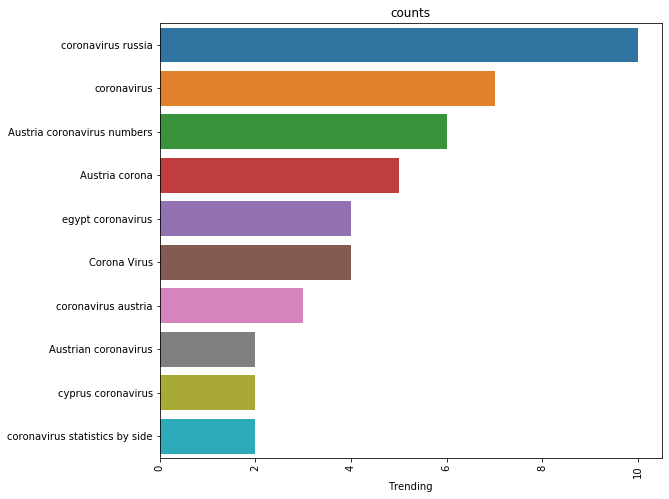

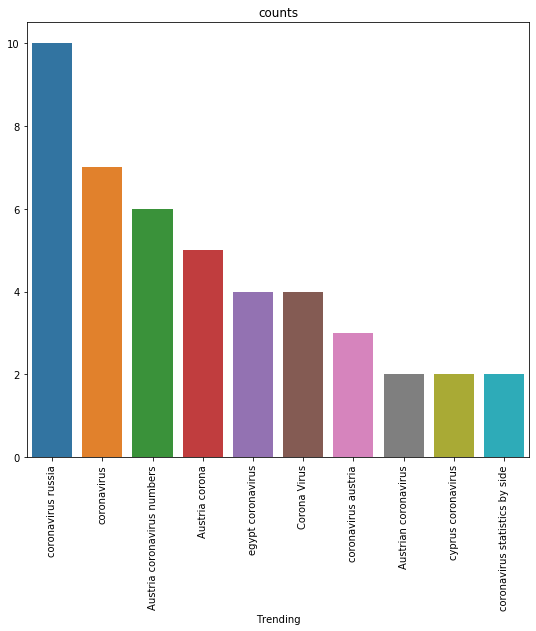

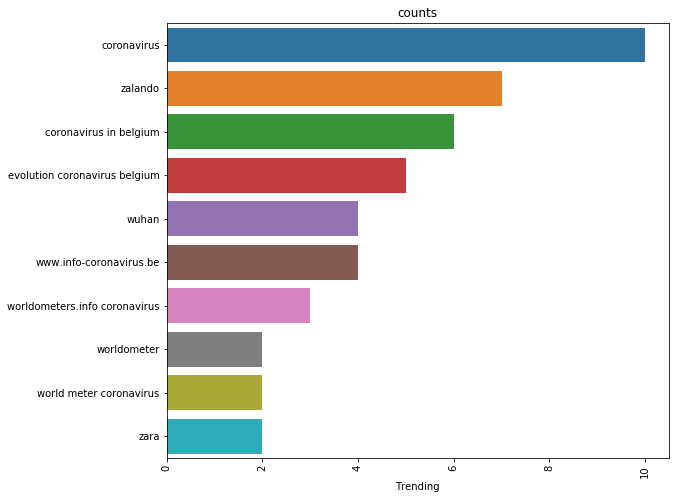

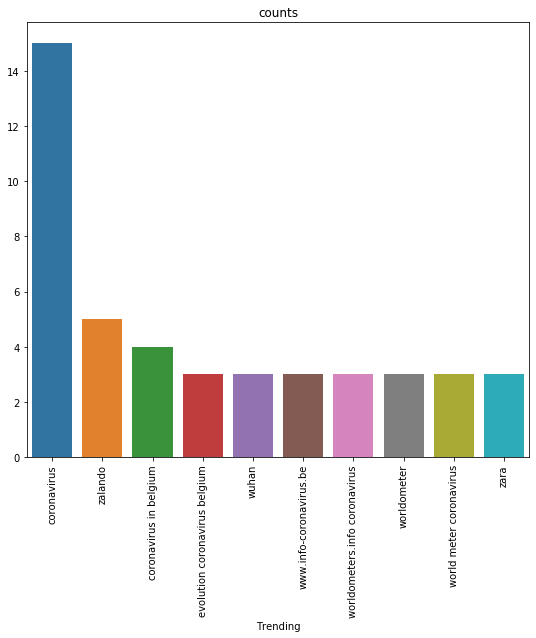

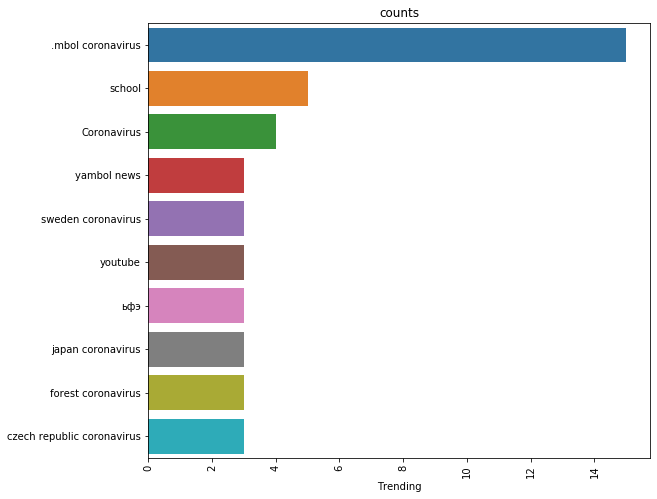

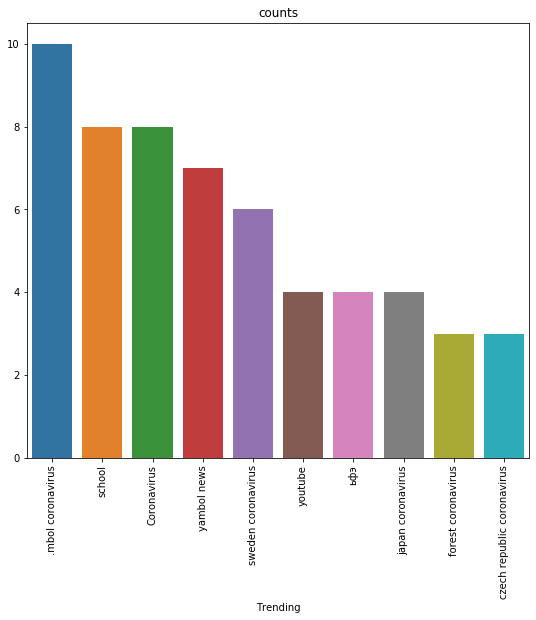

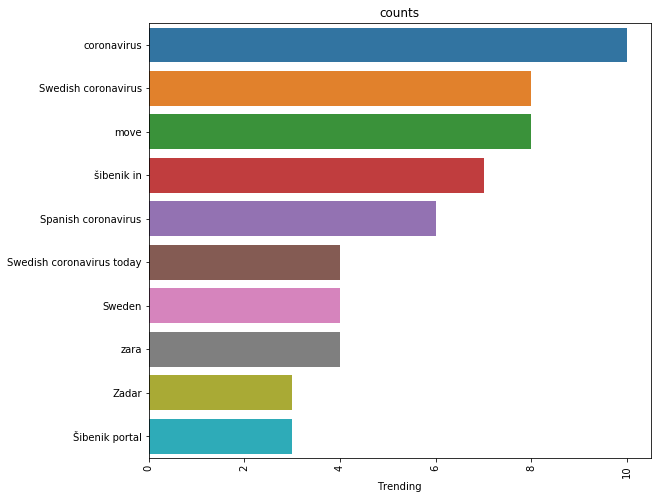

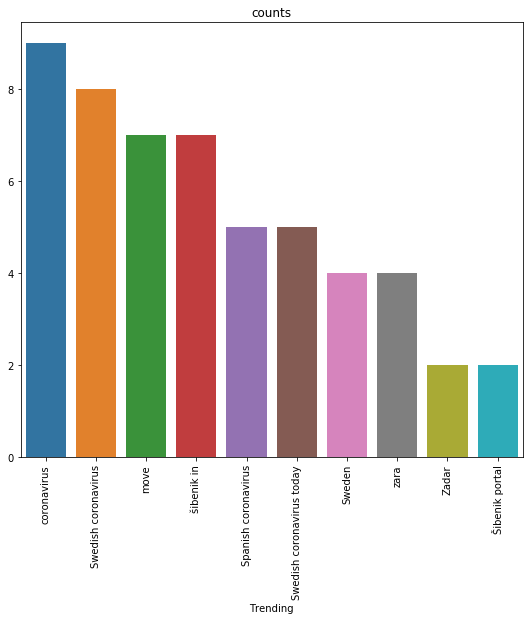

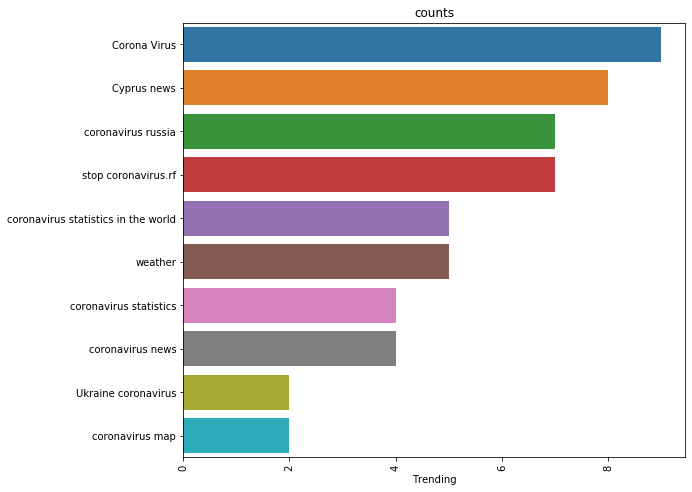

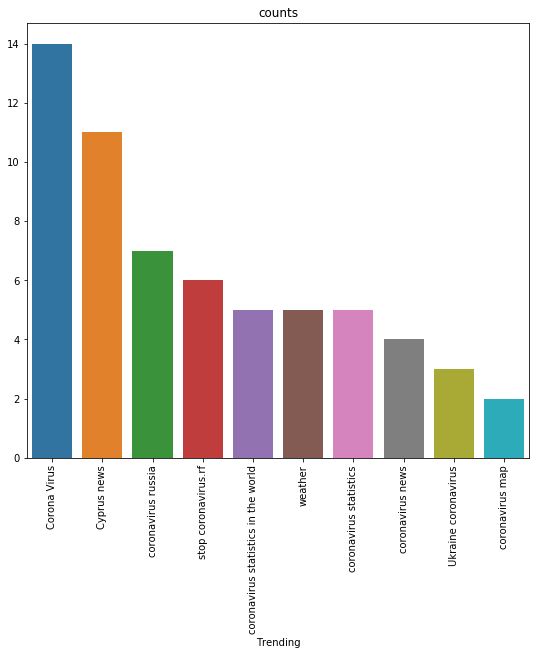

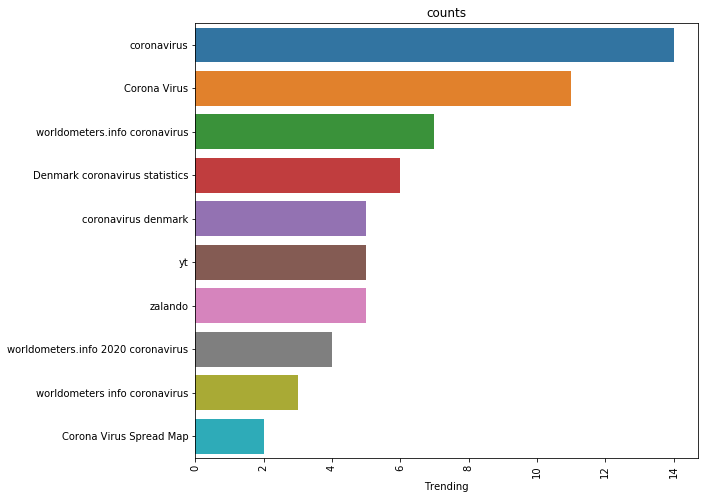

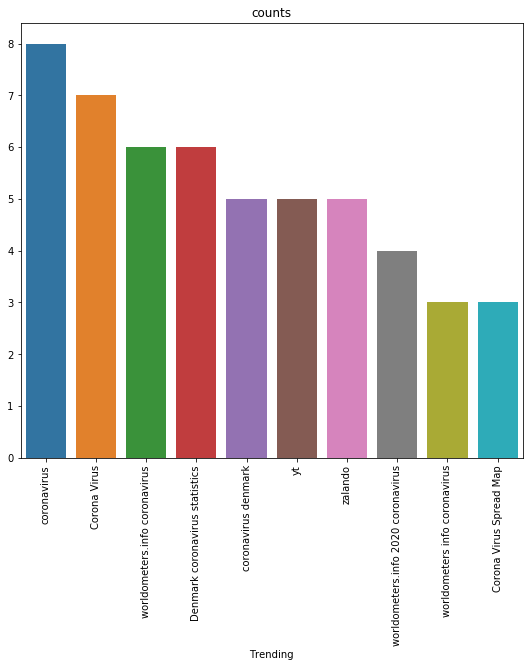

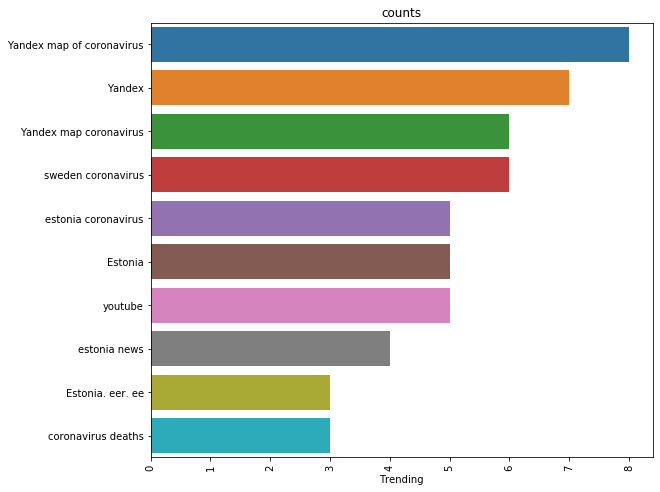

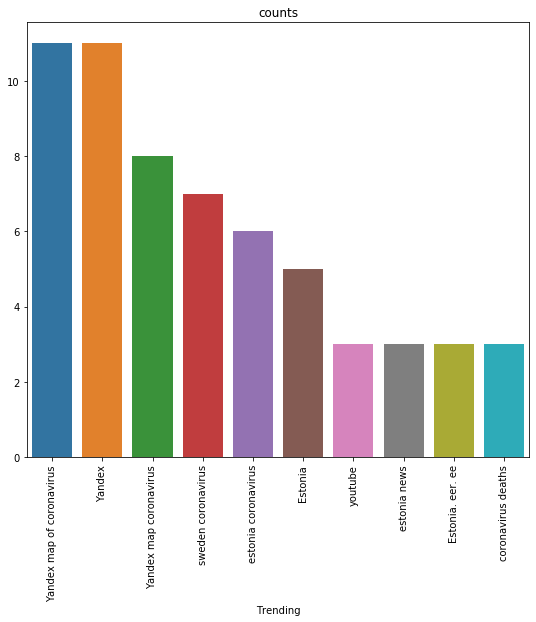

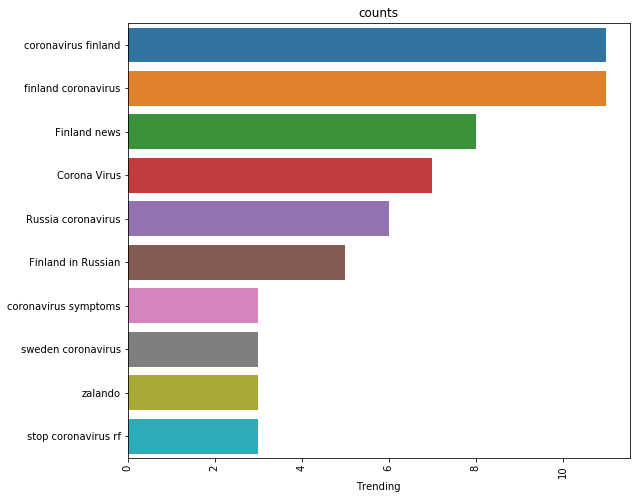

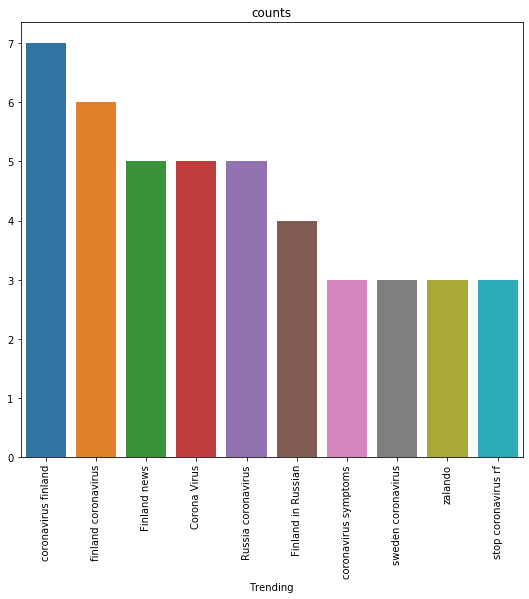

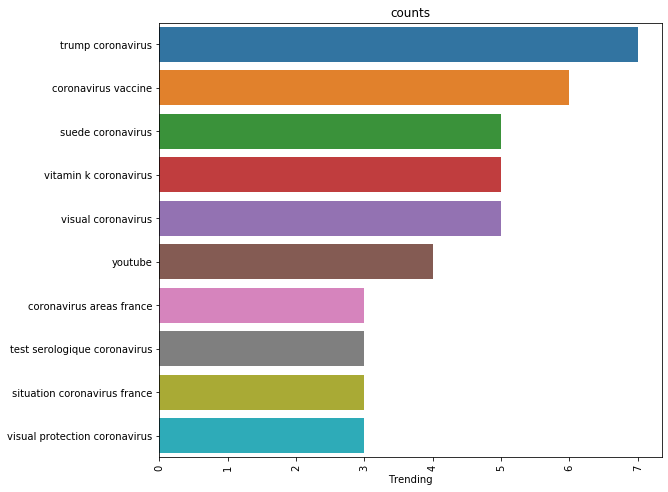

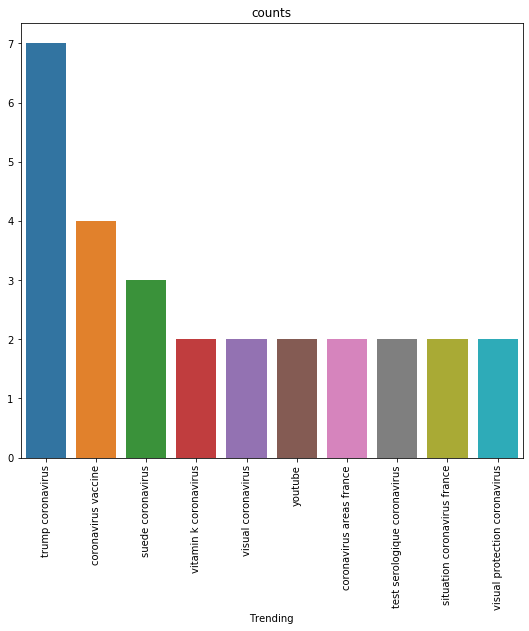

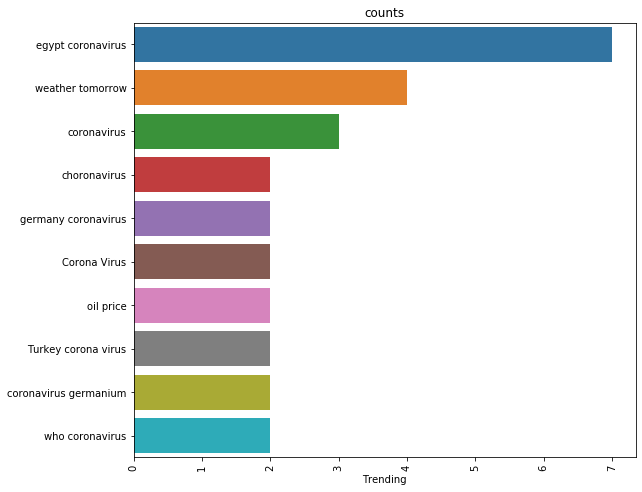

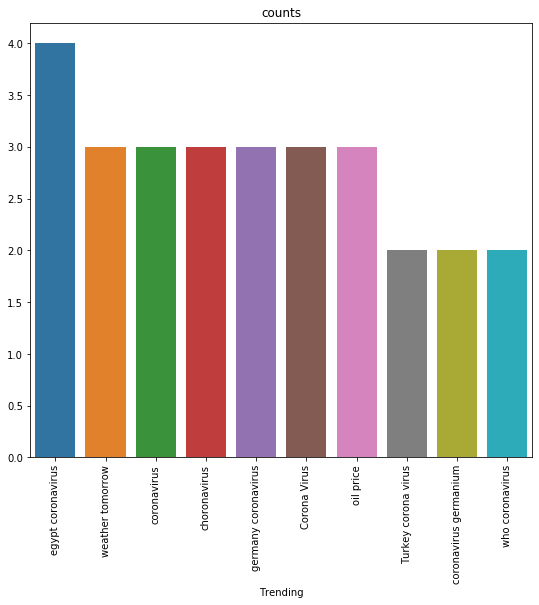

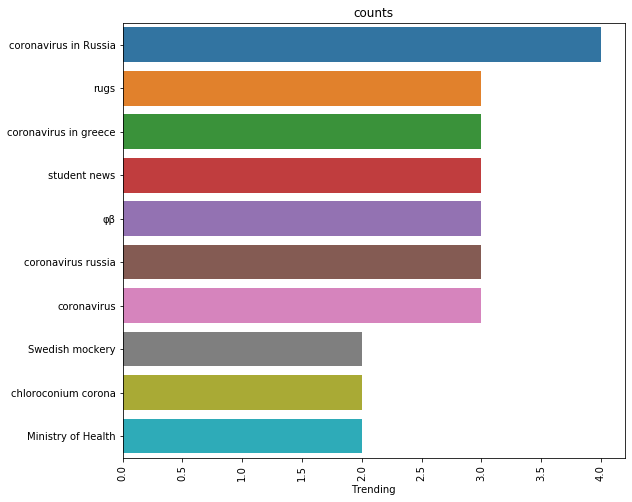

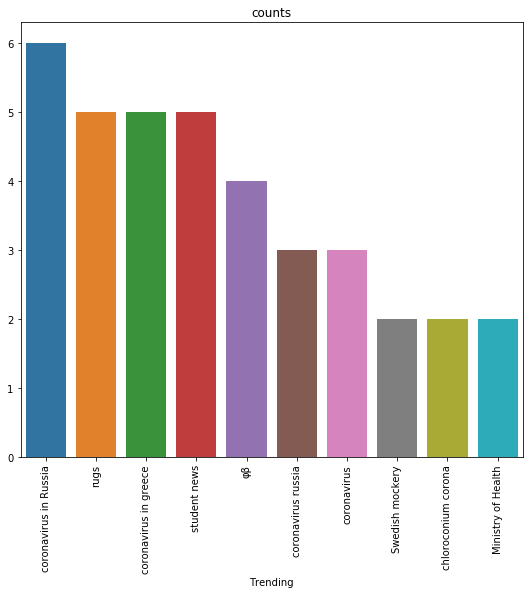

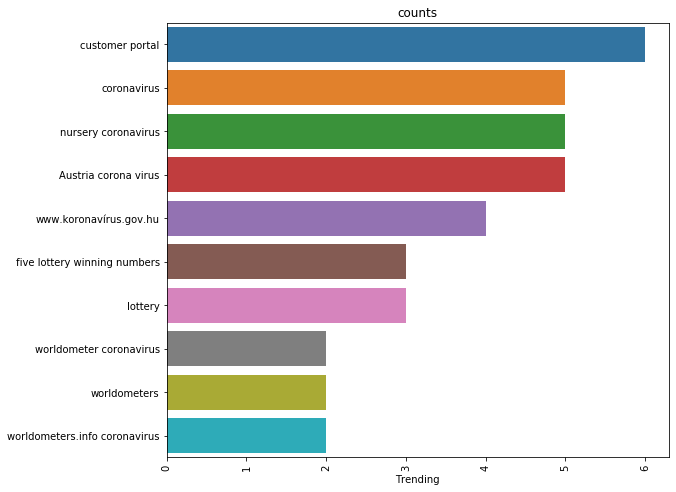

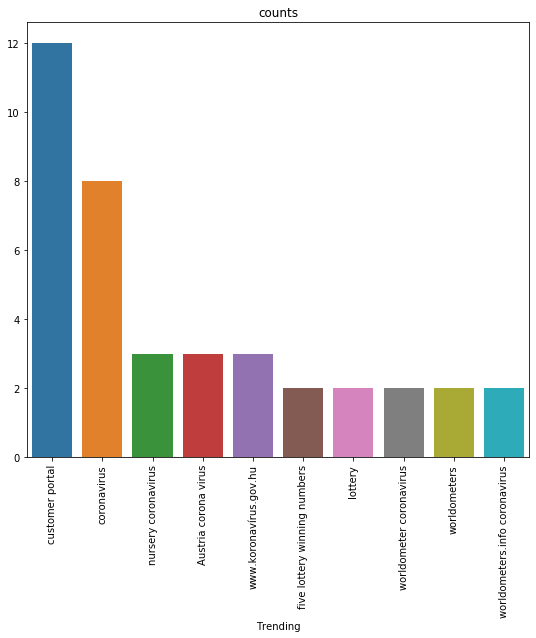

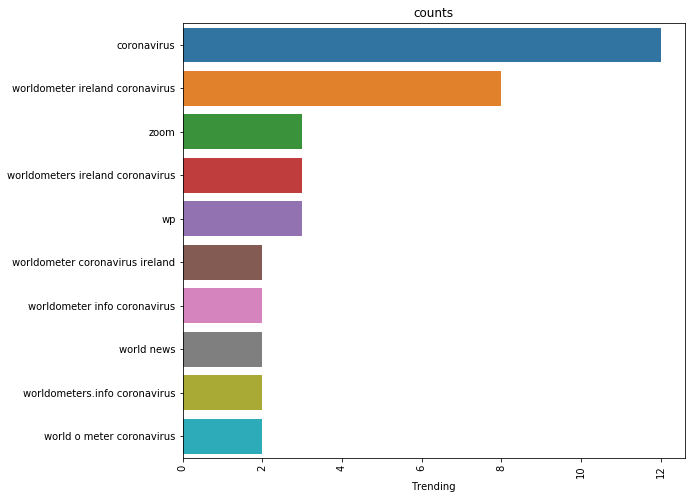

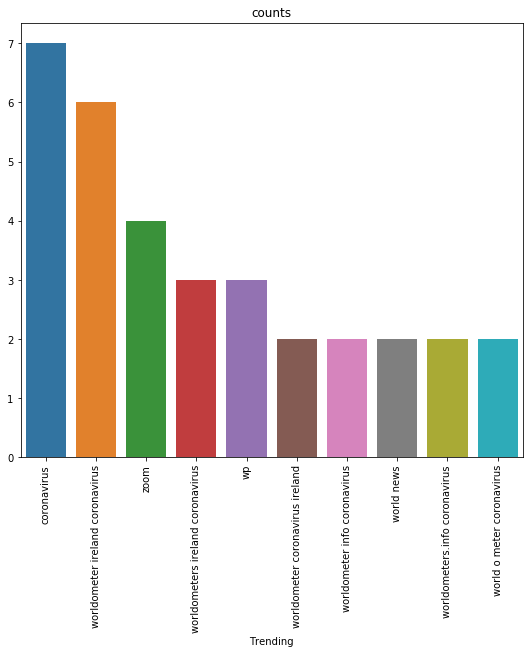

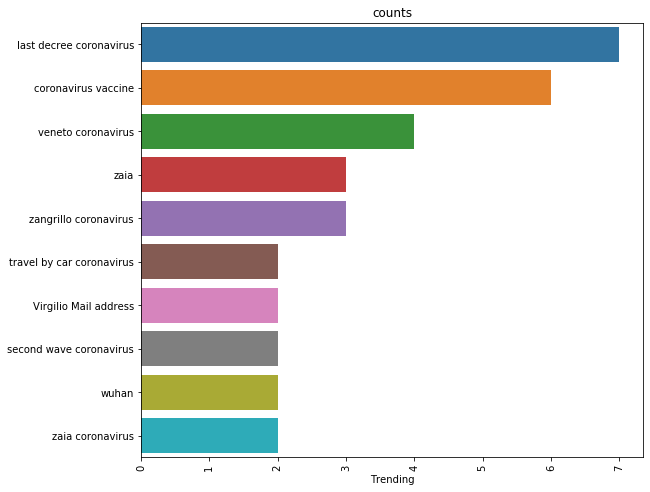

In [48]:
j=0
for i in range(1,int(len(new_topten.columns)/2)+1):
    z = new_topten.iloc[:,i-1:i].to_numpy()
    z = z.reshape(10)
    w = new_topten.iloc[:,i:i+1].to_numpy()
    w = w.reshape(10)
    plt.figure(figsize = (9,8))
    plt.xticks(rotation =90)
    plt.xlabel('Trending')
    plt.title(new_topten.columns[j])
    j +=2 
    sns.barplot(x=z,y=w)

### finding coordinates

In [49]:
key = '6a81373ae8d5411681c696936ff7c2df' # get api keys from here -https://opencagedata.com/api

In [50]:
geocoder = OpenCageGeocode(key)

In [51]:
list_lat = []   # create empty lists
list_long = []
for index, row in names_data.iterrows(): # iterate over rows in dataframe

    Countries = row['Country']      
    query = str(Countries)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    

names_data['lat'] = list_lat   
names_data['lon'] = list_long


#### Geometry point

In [52]:
crs = {'init':'epsg:4326'}

In [53]:
geometry = [Point(xy) for xy in zip(names_data['lat'],names_data['lon'])]

In [54]:
geo_df = gpd.GeoDataFrame(names_data, # specify our data
                          crs=crs, # specify our coordinate reference system
                         geometry = geometry) # sepcify the geometry list we created

In [55]:
geo_df.head()

,Country,Abbreviation,lat,lon,geometry
0,Austria,AT,47.200034,13.199959,POINT (47.20003 13.19996)
1,Belgium,BE,50.640281,4.666715,POINT (50.64028 4.66671)
2,Bulgaria,BG,42.607397,25.485662,POINT (42.60740 25.48566)
3,Croatia,HR,45.564344,17.011895,POINT (45.56434 17.01190)
4,Republic of Cyprus,CY,34.982302,33.145128,POINT (34.98230 33.14513)


In [56]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

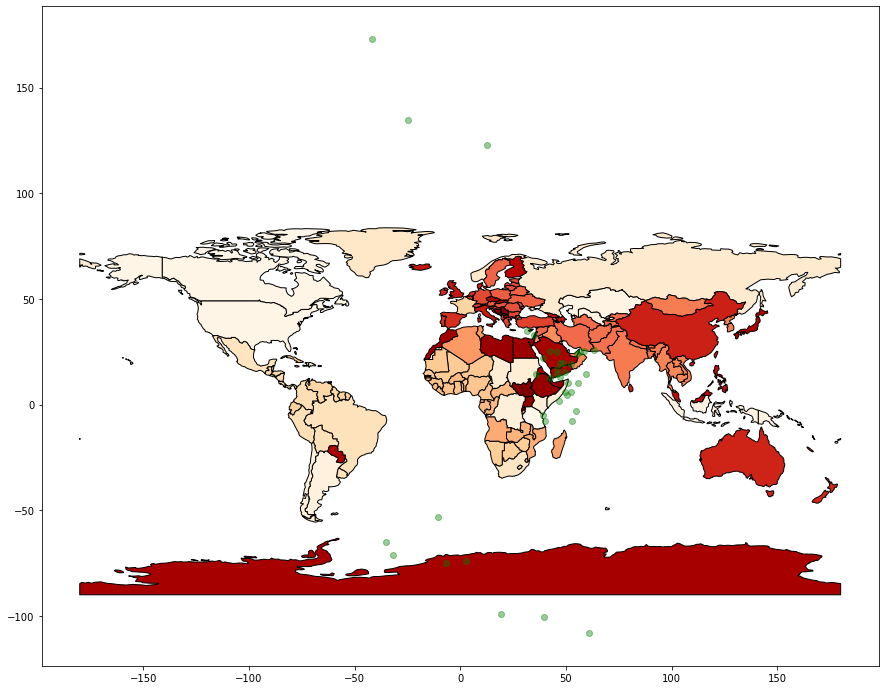

In [57]:
fig,ax = plt.subplots(figsize = (15,15))
base = world.plot(ax = ax,color='white', edgecolor='black',cmap='OrRd')
geo_df['geometry'].plot(ax = base, alpha = 0.4, color='green')

### Word Cloud

In [58]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'Trending'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
# d = 'https://github.com/taruntiwarihp/raw_images/blob/master/'

In [59]:
data = countries_trends_df
data.reset_index(drop=True, inplace=True)

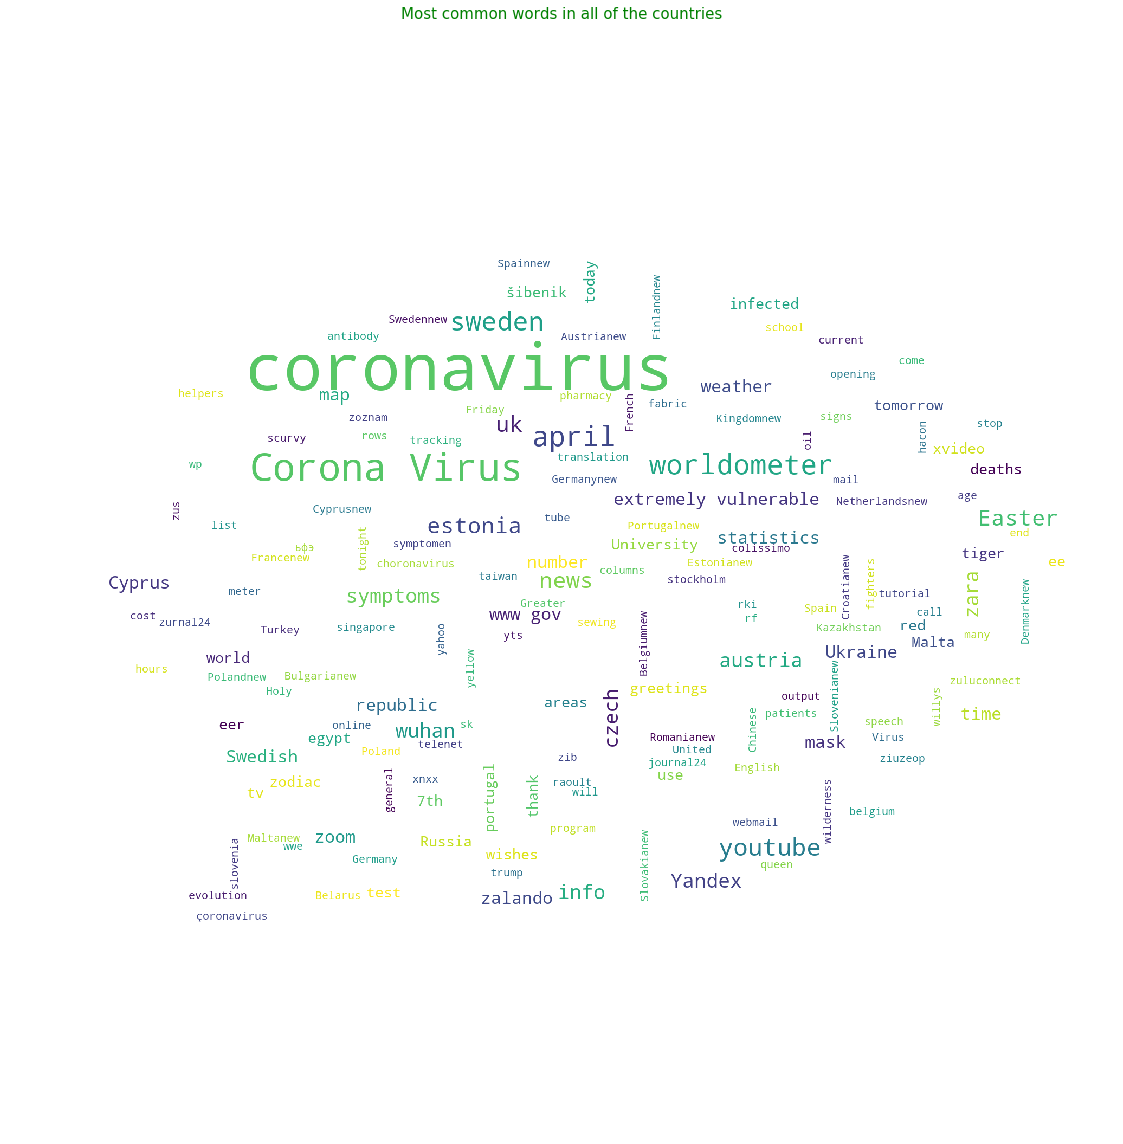

In [60]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the countries', title_size=15)

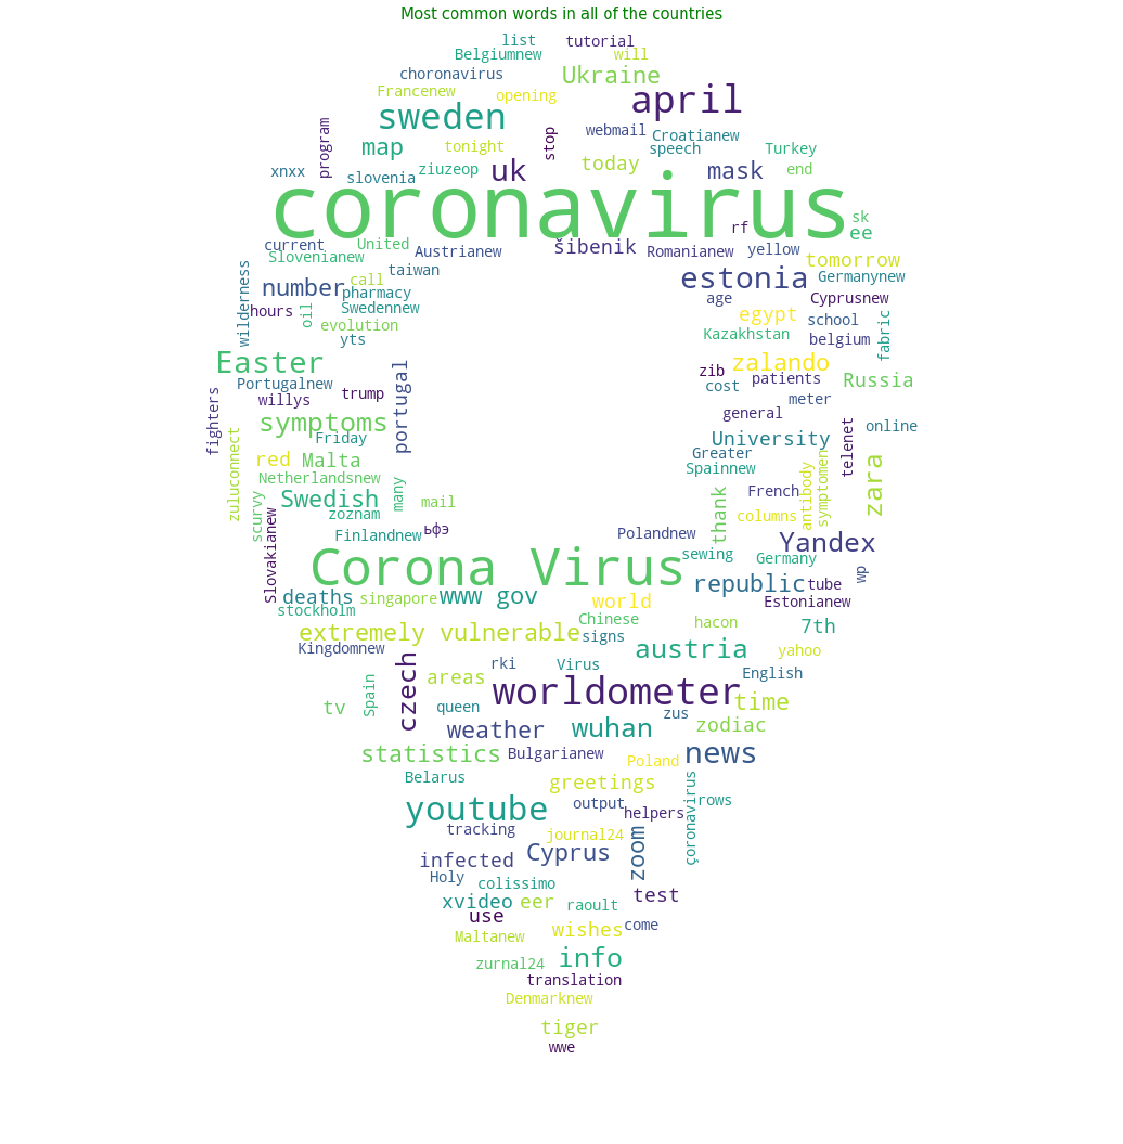

In [61]:
common_text = str(data)
common_mask = np.array(Image.open('loc.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the countries', title_size=15)

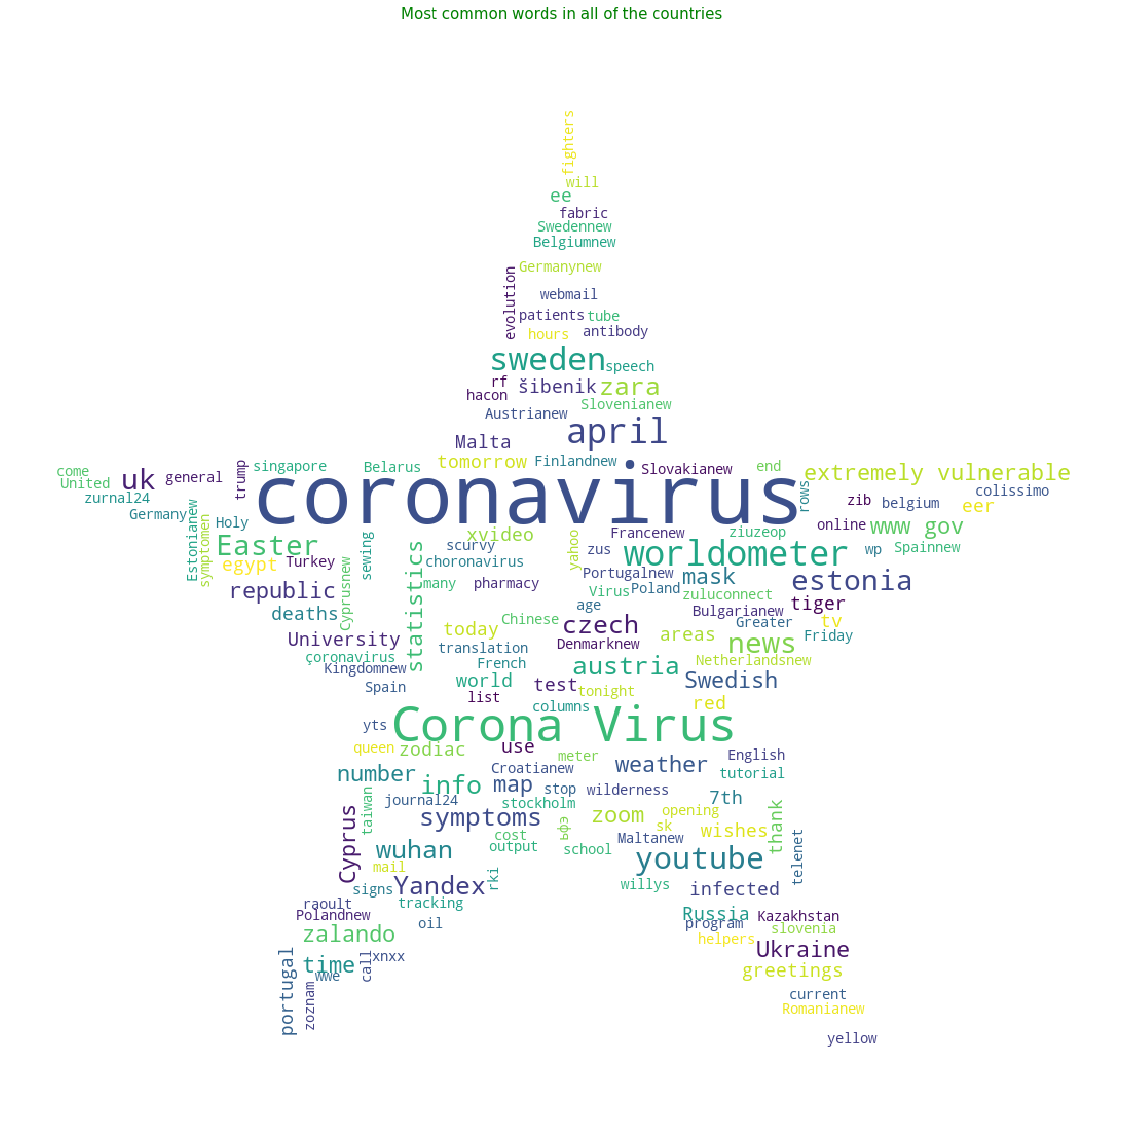

In [62]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the countries', title_size=15)

In [63]:
# content of wikipedia
result = wikipedia.summary('sushant singh rajput', sentences = 10) 
print(result)

Sushant Singh Rajput (21 January 1986 – 14 June 2020) was an Indian actor. Rajput started his career with television serials. His debut show was Star Plus's romantic drama Kis Desh Mein Hai Meraa Dil (2008), followed by a starring role in Zee TV's popular soap opera Pavitra Rishta (2009–11).
Rajput made his film debut in the buddy drama Kai Po Che! (2013), for which he received a nomination for the Filmfare Award for Best Male Debut. He then starred in the romantic comedy Shuddh Desi Romance (2013) and as the titular detective in the action thriller Detective Byomkesh Bakshy! (2015). His highest-grossing releases came with a supporting role in the satire PK (2014), followed by the titular role in the sports biopic M.S. Dhoni: The Untold Story (2016). For his performance in the latter, he received his first nomination for the Filmfare Award for Best Actor. Rajput went on to star in the commercially successful films Kedarnath (2018) and Chhichhore (2019).NITI Aayog, the policy think-tank

In [64]:
# top 10 news link of query
query = 'sushant singh rajput'
for i in search(query, tld="co.in",num=10, stop=10, pause=2):
    print(i)

https://www.republicworld.com/entertainment-news/bollywood-news/sushant-singh-rajputs-father-ankita-patna-aayi-thi-rhea-wedding-2021.html
https://www.hindustantimes.com/bollywood/manoj-bajpayee-on-sushant-singh-rajput-s-death-i-hadn-t-achieved-anything-till-the-age-of-34/story-mHGiQivFYYR30OnWxJOktM.html
https://hindi.news18.com/news/entertainment/rajkummar-rao-to-promote-sushant-singh-rajput-last-film-dil-bechara-ps-3161279.html
https://twitter.com/DisneyPlusHS/status/1276079165104513024?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Etweet
https://twitter.com/shekharsuman7/status/1275392077946216449?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Etweet
https://twitter.com/shekharsuman7/status/1275302237472845825?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Etweet
https://twitter.com/search?q=sushant+singh+rajput&ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Esearch
https://en.wikipedia.org/wiki/Sushant_Singh_Rajput
https://www.india.com/entertainment/bollywood-news-sushant-singh-r